In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [2]:
df_DA['month_no'] = df_DA['job_posted_date'].dt.month

In [3]:
df_da_explode = df_DA.explode('job_skills').copy()
df_da_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [5]:
df_da_pivot = df_da_explode.pivot_table(index='month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [6]:
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('Total')
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


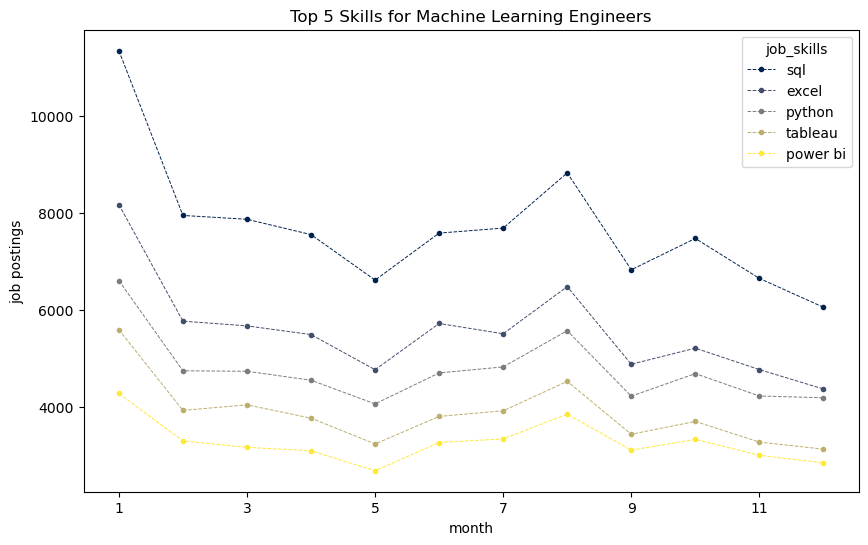

In [35]:
#remaking the chart from trending skills exercise

df_da_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=0.7,
    linestyle='--', # : for dotted chart, - for basic line, -. for line mixed w dots
    colormap='cividis',
    marker='o',
    markersize=3,
    figsize=(10,6)
)


plt.title('Top 5 Skills for Data Analytics')
plt.xlabel('month')
plt.ylabel('job postings')
plt.show()

In [41]:
from adjustText import adjust_text

In [42]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()

In [43]:
df_DE_exploded = df_DE.explode('job_skills')

skill_stats = df_DE_exploded.groupby('job_skills').agg(

    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')

).sort_values(by= 'skill_count', ascending=False).head(20)

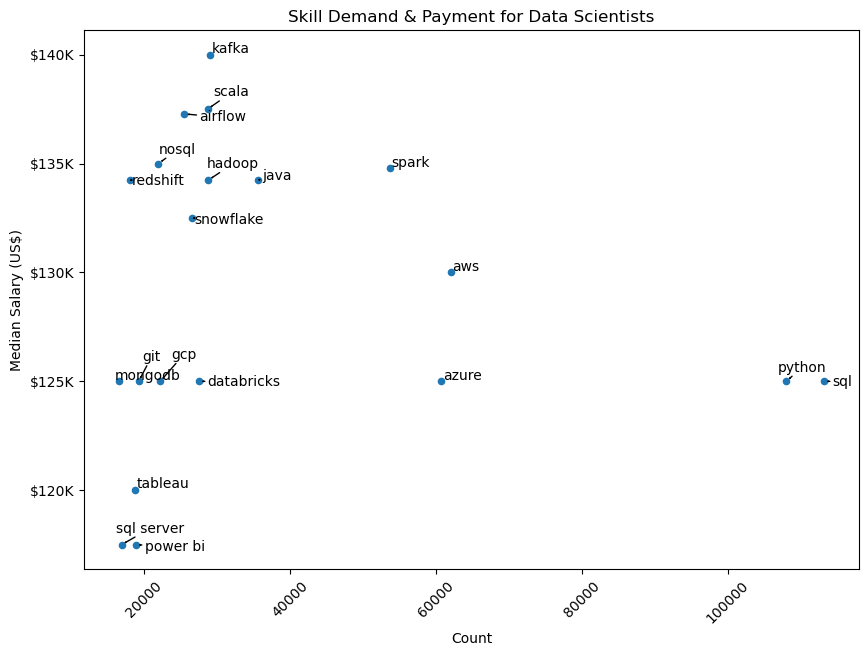

In [58]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(10,7))
plt.title('Skill Demand & Payment for Data Scientists')
plt.xlabel('Count')
plt.ylabel('Median Salary (US$)')
plt.xticks(rotation=45, ha='center')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='black', lw=1))

plt.show()